In [2]:
import numpy as np   
import pandas as pd
import os

import seaborn as sns
import matplotlib.pyplot as plt   
import matplotlib.style
plt.style.use('classic')

import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import RandomOverSampler  # 
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE,ADASYN

In [5]:
df = pd.read_csv("./../Dataset\German Credit Dataset.csv")

In [7]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

this is a very clean data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [12]:
Cat = []
Num = []

In [14]:
for i in df.drop('default', axis = 1, inplace = False).columns:
    if df[i].dtype == 'object':
        Cat.append(i)
    else:
        Num.append(i)


In [16]:
Cat

['checking_balance',
 'credit_history',
 'purpose',
 'savings_balance',
 'employment_duration',
 'other_credit',
 'housing',
 'job',
 'phone']

In [18]:
Num

['months_loan_duration',
 'amount',
 'percent_of_income',
 'years_at_residence',
 'age',
 'existing_loans_count',
 'dependents']

In [20]:
for i in Cat:
    print(df[i].value_counts())
    print()

checking_balance
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: count, dtype: int64

credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64

purpose
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: count, dtype: int64

savings_balance
< 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: count, dtype: int64

employment_duration
1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: count, dtype: int64

other_credit
none     814
bank     139
store     47
Name: count, dtype: int64

housing
own      713
rent     179
other    108
Name: count, dtype: int64

job
skilled       630
unskilled     200
management    148
unemployed     22
Name: count, dtype: int64

phone
no

In [22]:
df['purpose'].replace('car0', 'car', inplace = True)  # to replace to column with car and the data will be added to that column car0 -> car

In [24]:
for i in Cat:
    print(df[i].value_counts(normalize = True))  # normalise represents in percentage (%)
    print()

checking_balance
unknown       0.394
< 0 DM        0.274
1 - 200 DM    0.269
> 200 DM      0.063
Name: proportion, dtype: float64

credit_history
good         0.530
critical     0.293
poor         0.088
very good    0.049
perfect      0.040
Name: proportion, dtype: float64

purpose
furniture/appliances    0.473
car                     0.349
business                0.097
education               0.059
renovations             0.022
Name: proportion, dtype: float64

savings_balance
< 100 DM         0.603
unknown          0.183
100 - 500 DM     0.103
500 - 1000 DM    0.063
> 1000 DM        0.048
Name: proportion, dtype: float64

employment_duration
1 - 4 years    0.339
> 7 years      0.253
4 - 7 years    0.174
< 1 year       0.172
unemployed     0.062
Name: proportion, dtype: float64

other_credit
none     0.814
bank     0.139
store    0.047
Name: proportion, dtype: float64

housing
own      0.713
rent     0.179
other    0.108
Name: proportion, dtype: float64

job
skilled       0.630
unskil

In [26]:
data = df.copy() # making copy of df and store for later

#### One HOT Encoding

In [29]:
# get dummies from df as we have changed the datatype of cat to objects in df
df_encoded = pd.get_dummies(df, columns = Cat, drop_first = False)

In [31]:
# display.max_columns to None: This tells Pandas to display all columns without truncation.
pd.set_option('display.max_columns', None) 

df_encoded.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,no,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
1,48,5951,2,2,22,1,1,yes,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
2,12,2096,2,3,49,1,2,no,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False
3,42,7882,2,4,45,1,2,no,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
4,24,4870,3,4,53,2,2,yes,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False


In [33]:
if "default" in df_encoded.columns:
    print("Yes")
else:
    print("No")

Yes


In [35]:
df_encoded['default'].replace({'yes': 1, 'no': 0}, inplace = True)

In [37]:
df_encoded.head() # see the "default" column that it has changed to 0 and 1

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
1,48,5951,2,2,22,1,1,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
2,12,2096,2,3,49,1,2,0,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False
3,42,7882,2,4,45,1,2,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
4,24,4870,3,4,53,2,2,1,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False


In [39]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 44 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   months_loan_duration             1000 non-null   int64
 1   amount                           1000 non-null   int64
 2   percent_of_income                1000 non-null   int64
 3   years_at_residence               1000 non-null   int64
 4   age                              1000 non-null   int64
 5   existing_loans_count             1000 non-null   int64
 6   dependents                       1000 non-null   int64
 7   default                          1000 non-null   int64
 8   checking_balance_1 - 200 DM      1000 non-null   bool 
 9   checking_balance_< 0 DM          1000 non-null   bool 
 10  checking_balance_> 200 DM        1000 non-null   bool 
 11  checking_balance_unknown         1000 non-null   bool 
 12  credit_history_critical          1000 non-null   

---

## Test_Train Data

In [43]:
X = df_encoded.drop('default', axis=1)   # use df_encoded, as changes made on this only 

Y = df_encoded[['default']]

In [45]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.25, random_state=1)

In [47]:
X_train.shape

(750, 43)

In [49]:
X_test.shape

(250, 43)

---

## Building Decision Tree Model

In [53]:
dt_model = DecisionTreeClassifier()

In [55]:
dt_model.fit(X_train, Y_train)

DecisionTreeClassifier()

---

#### Model Evaluation

In [59]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [61]:
# for Train data

def evaluate_train_model(model):
    Y_train_predict = model.predict(X_train)

    Acc_train = print(model.score(X_train,Y_train))

    CM_train = print(sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(Y_train,Y_train_predict))

    probs = model.predict_proba(X_train)
    probs = probs[:, 1]
    auc_train = roc_auc_score(Y_train, probs)
    
    return Acc_train,CM_train,CR_train,auc_train  


In [63]:
# for Test Data

def evaluate_test_model(model):
    Y_test_predict = model.predict(X_test)

    Acc_test = print("The accuracuy of the model is {}".format(model.score(X_test,Y_test)))

    CM_test = print(sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(Y_test,Y_test_predict))

    probs = model.predict_proba(X_test)
    probs = probs[:, 1]
    auc_test = roc_auc_score(Y_test, probs)
    
    return Acc_test,CM_test,CR_test,auc_test

1.0
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       226

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



(None, None, None, 1.0)

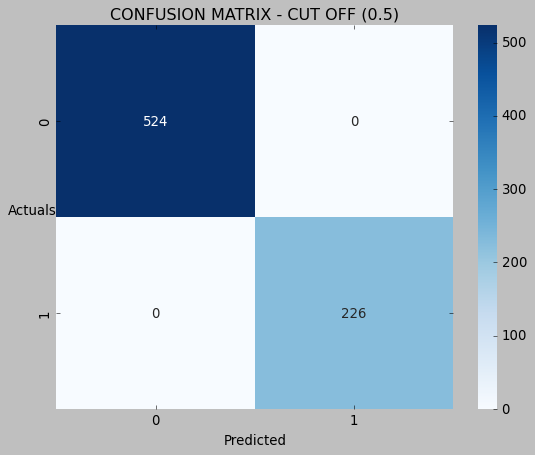

In [65]:
evaluate_train_model(dt_model)

The accuracuy of the model is 0.68
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.76      0.80      0.78       176
           1       0.45      0.39      0.42        74

    accuracy                           0.68       250
   macro avg       0.61      0.60      0.60       250
weighted avg       0.67      0.68      0.67       250



(None, None, None, 0.5965141277641277)

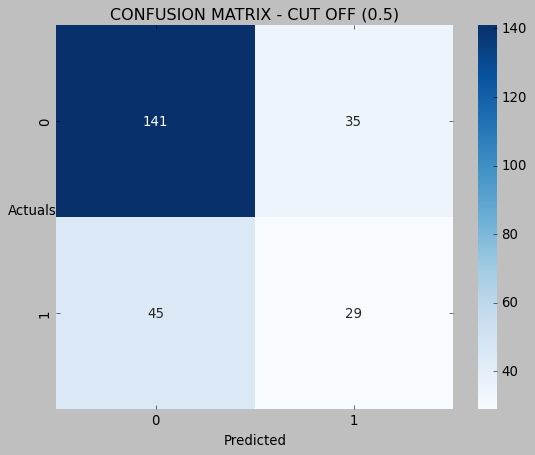

In [67]:
evaluate_test_model(dt_model)

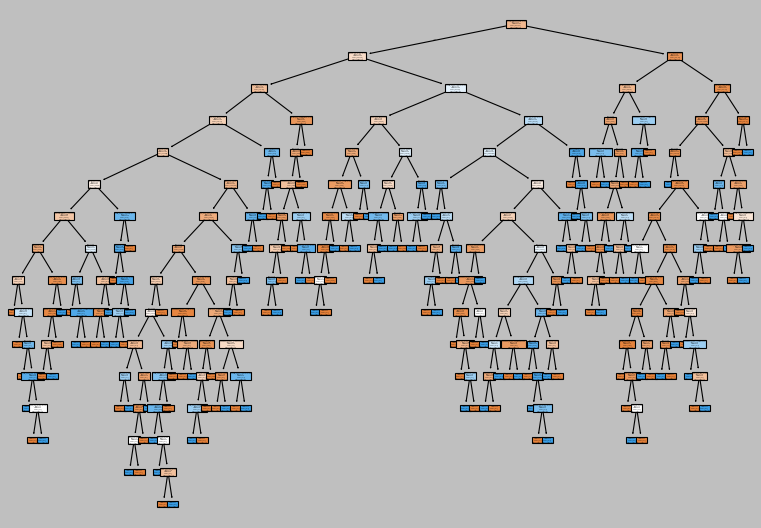

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming you have a trained DecisionTreeClassifier model named 'dt_model' and 
# your feature data is in a Pandas DataFrame named 'X'

plt.figure(figsize=(12, 8))

plot_tree(dt_model, 
          feature_names=X.columns,  # Replace X with your feature DataFrame
          class_names=["Default_Yes", "Default_No"], # Replace with your class names if needed
          filled=True)

plt.show()

### Feature Importance

In [69]:
dt_model.feature_importances_

array([0.13117002, 0.18238306, 0.0407775 , 0.02000771, 0.09718701,
       0.02071744, 0.00446201, 0.        , 0.02704814, 0.        ,
       0.10103475, 0.02624219, 0.02241286, 0.01629027, 0.01659945,
       0.01443293, 0.01016987, 0.02610342, 0.00985161, 0.00808565,
       0.00435432, 0.        , 0.00861216, 0.02195575, 0.00900718,
       0.00949976, 0.01599881, 0.00833721, 0.01258992, 0.03848158,
       0.00527765, 0.00482528, 0.01217103, 0.00931425, 0.00728315,
       0.0109775 , 0.00422212, 0.00469433, 0.00744148, 0.        ,
       0.01474583, 0.00422212, 0.01101269])

In [71]:
len(dt_model.feature_importances_)

43

In [73]:
pd.DataFrame(dt_model.feature_importances_*100
             ,index = X.columns, columns=['Imp']).sort_values(by='Imp', ascending=False)

,Imp
amount,18.238306
months_loan_duration,13.117002
checking_balance_unknown,10.103475
age,9.718701
percent_of_income,4.077750
employment_duration_> 7 years,3.848158
checking_balance_< 0 DM,2.704814
credit_history_critical,2.624219
purpose_car,2.610342
credit_history_good,2.241286


In [75]:
df_encoded.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,default,checking_balance_1 - 200 DM,checking_balance_< 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance_< 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration_< 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,6,1169,4,4,67,2,1,0,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
1,48,5951,2,2,22,1,1,1,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
2,12,2096,2,3,49,1,2,0,False,False,False,True,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,True,True,False
3,42,7882,2,4,45,1,2,0,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False
4,24,4870,3,4,53,2,2,1,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,True,False,False,True,False


#### DT Pruning

Pruning is a technique in machine learning that removes unnecessary parts of a model to make it more efficient and accurate. It can be used in decision trees, neural networks, and data sets. 


In [78]:
dt_model_pru = DecisionTreeClassifier(criterion= 'gini', 
                                      max_depth= 7, 
                                      min_samples_leaf=30, 
                                      min_samples_split=20,
                                      max_leaf_nodes=7
                                     )

In [80]:
dt_model_pru.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=7, min_samples_leaf=30,
                       min_samples_split=20)

0.736
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.76      0.90      0.83       524
           1       0.61      0.35      0.44       226

    accuracy                           0.74       750
   macro avg       0.69      0.63      0.64       750
weighted avg       0.72      0.74      0.71       750



(None, None, None, 0.7596855367155306)

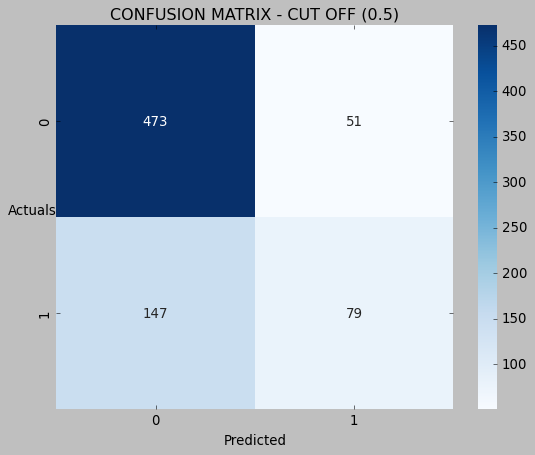

In [82]:
evaluate_train_model(dt_model_pru)

The accuracuy of the model is 0.752
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.77      0.93      0.84       176
           1       0.66      0.34      0.45        74

    accuracy                           0.75       250
   macro avg       0.71      0.63      0.64       250
weighted avg       0.74      0.75      0.72       250



(None, None, None, 0.7539542383292384)

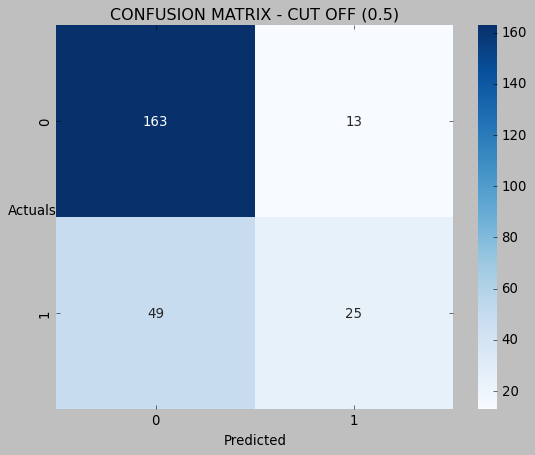

In [84]:
evaluate_test_model(dt_model_pru)

In [86]:
dt_model_pru_2 = DecisionTreeClassifier(criterion= 'entropy', 
                                      max_depth= 7, 
                                      min_samples_leaf=30, 
                                      min_samples_split=20,
                                      max_leaf_nodes=7
                                     )

In [88]:
dt_model_pru_2.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, max_leaf_nodes=7,
                       min_samples_leaf=30, min_samples_split=20)

0.7266666666666667
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       524
           1       0.56      0.44      0.49       226

    accuracy                           0.73       750
   macro avg       0.67      0.65      0.65       750
weighted avg       0.71      0.73      0.72       750



(None, None, None, 0.7561642910220902)

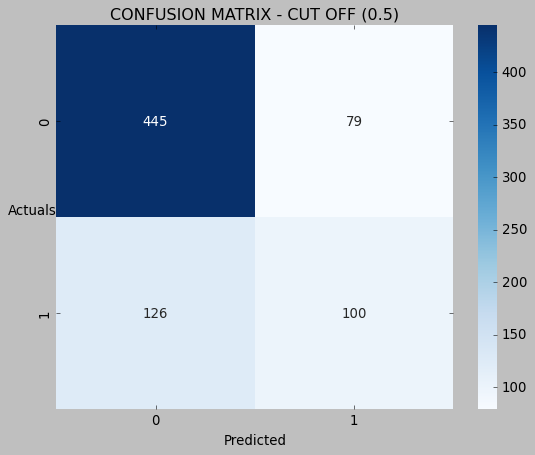

In [90]:
evaluate_train_model(dt_model_pru_2)

The accuracuy of the model is 0.704
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.76      0.84      0.80       176
           1       0.50      0.38      0.43        74

    accuracy                           0.70       250
   macro avg       0.63      0.61      0.62       250
weighted avg       0.69      0.70      0.69       250



(None, None, None, 0.7208230958230958)

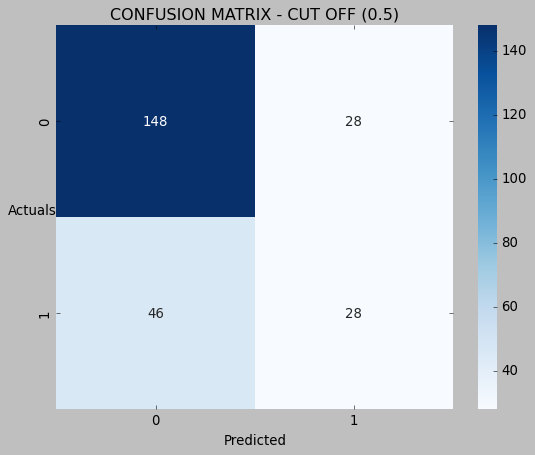

In [92]:
evaluate_test_model(dt_model_pru_2)

## Running Grid Search

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Measure of split quality
    'max_depth': [3, 5, 10, None],             # Tree depth
    'min_samples_split': [2, 5, 10],          # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],            # Minimum samples in a leaf node
    'max_features': [None, 'sqrt', 'log2']   # Features to consider for splits 
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator= DecisionTreeClassifier(),  # The model to search over
    param_grid=param_grid,              # The parameter grid
    scoring='recall',                   # The evaluation metric to optimise(you can change this)
    cv=5,                              # Number of cross-validation folds
    verbose=1,                           # Verbosity level (optional)
    n_jobs=-1                           # Use all available cores (optional)
)

# Perform the grid search
grid_search.fit(X_train, Y_train)  # Replace X_train, y_train with your data

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
Best recall: 0.513719806763285


In [55]:
best_model

DecisionTreeClassifier(max_features='sqrt')

1.0
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       226

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



(None, None, None, 1.0)

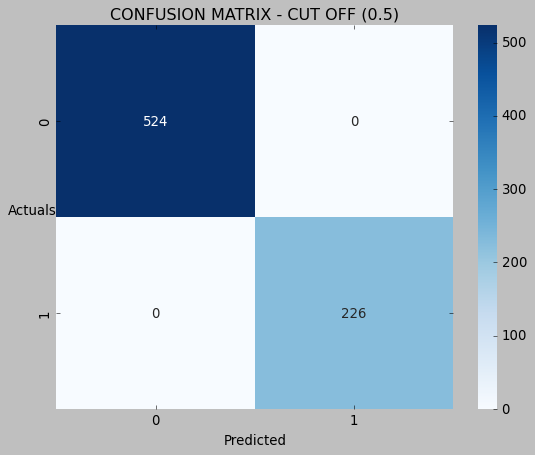

In [56]:
evaluate_train_model(best_model)

The accuracuy of the model is 0.656
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.76      0.74      0.75       176
           1       0.42      0.46      0.44        74

    accuracy                           0.66       250
   macro avg       0.59      0.60      0.60       250
weighted avg       0.66      0.66      0.66       250



(None, None, None, 0.5990479115479116)

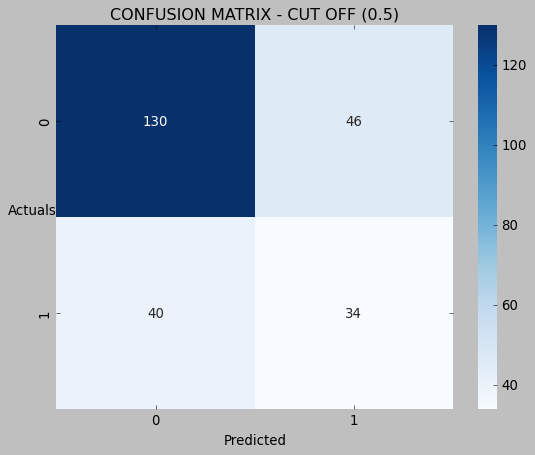

In [57]:
evaluate_test_model(best_model)

In [58]:
### doing some changes in the code >>>

# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Measure of split quality
    'max_depth': range(5, 16),             # Tree depth
    'min_samples_split': range(10, 30),          # Minimum samples to split a node
    'min_samples_leaf': range(10, 20),            # Minimum samples in a leaf node
    'max_features': [None, 'sqrt', 'log2']   # Features to consider for splits 
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator= DecisionTreeClassifier(),  # The model to search over
    param_grid=param_grid,              # The parameter grid
    scoring='recall',                   # The evaluation metric to optimise(you can change this)
    cv=5,                              # Number of cross-validation folds
    verbose=1,                           # Verbosity level (optional)
    n_jobs=-1                           # Use all available cores (optional)
)

# Perform the grid search
grid_search.fit(X_train, Y_train)  # Replace X_train, y_train with your data

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 19800 candidates, totalling 99000 fits
Best parameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 'sqrt', 'min_samples_leaf': 11, 'min_samples_split': 17}
Best recall: 0.4916908212560386


0.7586666666666667
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       524
           1       0.65      0.44      0.52       226

    accuracy                           0.76       750
   macro avg       0.72      0.67      0.68       750
weighted avg       0.75      0.76      0.74       750



(None, None, None, 0.8159790245220563)

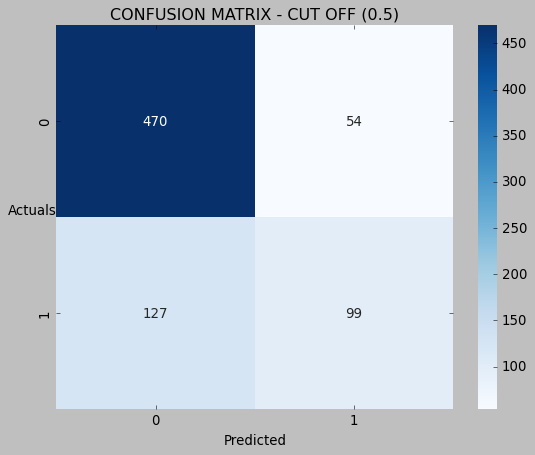

In [59]:
evaluate_train_model(best_model)

The accuracuy of the model is 0.672
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.74      0.82      0.78       176
           1       0.43      0.31      0.36        74

    accuracy                           0.67       250
   macro avg       0.58      0.57      0.57       250
weighted avg       0.65      0.67      0.66       250



(None, None, None, 0.6616246928746928)

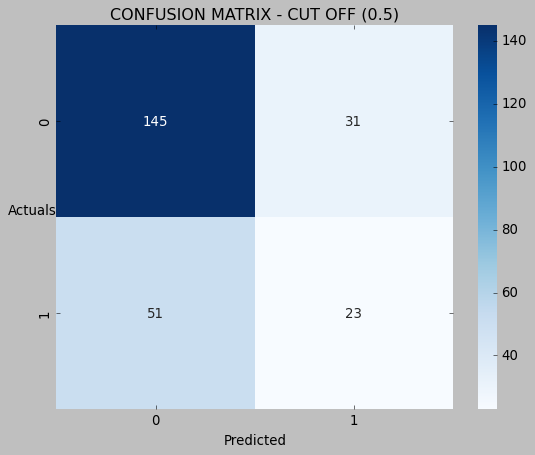

In [60]:
evaluate_test_model(best_model)

## Ensembling

### Bagging

In [95]:
bgcl = BaggingClassifier(estimator= dt_model, n_estimators= 5)

In [97]:
bgcl.fit(X_train, Y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=5)

0.948
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       524
           1       0.94      0.88      0.91       226

    accuracy                           0.95       750
   macro avg       0.95      0.93      0.94       750
weighted avg       0.95      0.95      0.95       750



(None, None, None, 0.9877896372356955)

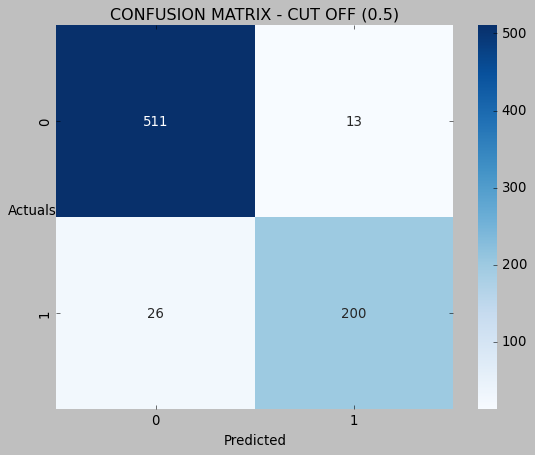

In [99]:
evaluate_train_model(bgcl)

The accuracuy of the model is 0.716
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       176
           1       0.52      0.49      0.50        74

    accuracy                           0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.71      0.72      0.71       250



(None, None, None, 0.735296375921376)

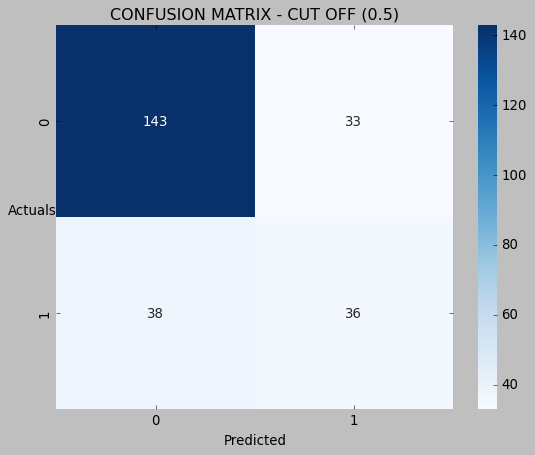

In [101]:
evaluate_test_model(bgcl)

In [103]:
### doing some changes in the code for bagging classifier >>>

# Define the parameter grid
param_grid = {
    'n_estimators': range(10, 101)
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(
    estimator= bgcl,  # The model to search over
    param_grid=param_grid,              # The parameter grid
    scoring='recall',                   # The evaluation metric to optimise(you can change this)
    cv=5,                              # Number of cross-validation folds
    verbose=1,                           # Verbosity level (optional), displays progress
    n_jobs=-1                           # Use all available cores (optional)
)

# Perform the grid search
grid_search.fit(X_train, Y_train)  # Replace X_train, y_train with your data

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best recall:", grid_search.best_score_)

# Best model
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 91 candidates, totalling 455 fits


KeyboardInterrupt: 

In [ ]:
best_model

In [ ]:
evaluate_train_model(best_model)

In [ ]:
evaluate_test_model(best_model)

---

### Boosting

##### Ada Boost

AdaBoost is an iterative ensemble method. AdaBoost classifier builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier.

Adaboost should meet two conditions:

- The classifier should be trained interactively on various weighed training examples.
- In each iteration, it tries to provide an excellent fit for these examples by minimizing training error.

"The most important parameters are **base_estimator**, ***n_estimators***, and ***learning_rate***."

In [121]:
AD_Boost = AdaBoostClassifier()

In [123]:
AD_Boost.fit(X_train, Y_train)

AdaBoostClassifier()

0.792
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.83      0.88      0.86       524
           1       0.68      0.59      0.63       226

    accuracy                           0.79       750
   macro avg       0.76      0.73      0.74       750
weighted avg       0.79      0.79      0.79       750



(None, None, None, 0.8550378301695601)

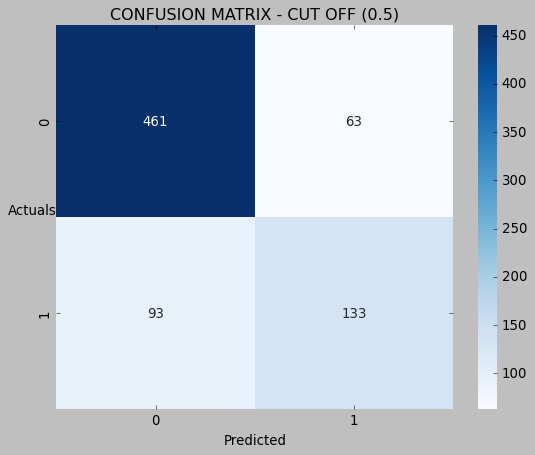

In [125]:
evaluate_train_model(AD_Boost)

The accuracuy of the model is 0.728
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       176
           1       0.56      0.39      0.46        74

    accuracy                           0.73       250
   macro avg       0.67      0.63      0.64       250
weighted avg       0.71      0.73      0.71       250



(None, None, None, 0.7433200245700246)

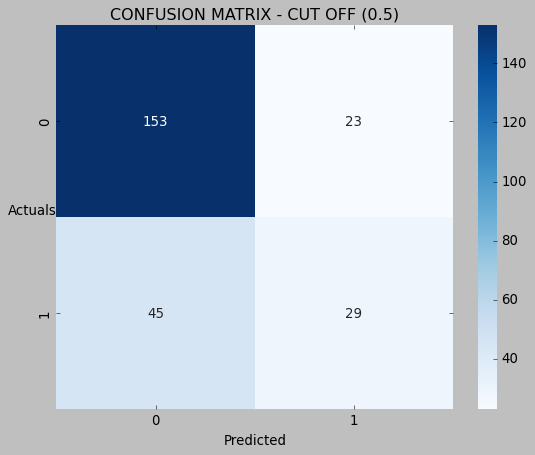

In [127]:
evaluate_test_model(AD_Boost)

##### Gradient Boosting

Gradient boosting is a machine learning technique that combines multiple weak models to create a more accurate predictive model. It's used for both regression and classification tasks. 

In [130]:
GB_Boost = GradientBoostingClassifier()

GB_Boost.fit(X_train, Y_train)

GradientBoostingClassifier()

0.9026666666666666
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       524
           1       0.94      0.73      0.82       226

    accuracy                           0.90       750
   macro avg       0.91      0.85      0.88       750
weighted avg       0.91      0.90      0.90       750



(None, None, None, 0.9627355941363236)

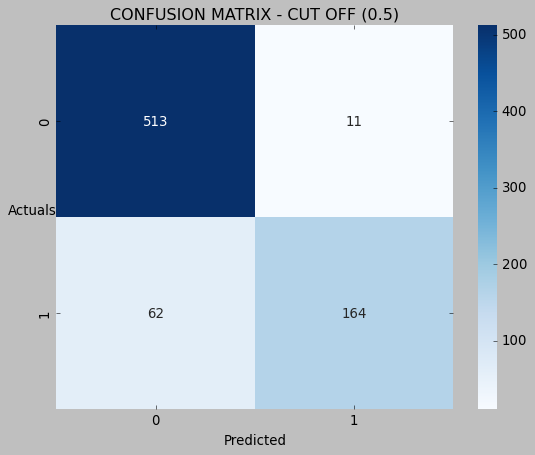

In [132]:
evaluate_train_model(GB_Boost)

The accuracuy of the model is 0.764
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       176
           1       0.65      0.43      0.52        74

    accuracy                           0.76       250
   macro avg       0.72      0.67      0.68       250
weighted avg       0.75      0.76      0.75       250



(None, None, None, 0.754914004914005)

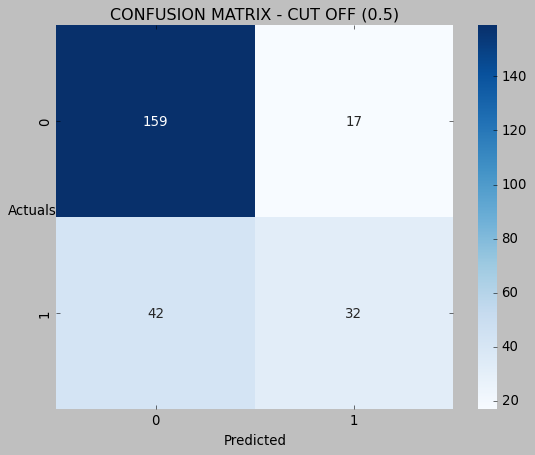

In [134]:
evaluate_test_model(GB_Boost)

##### XG Boost (Extreme Gradient Boosting)

In [137]:
!pip install xgboost

In [138]:
import xgboost as xgb
from xgboost import XGBClassifier

In [141]:
Y_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 750 entries, 298 to 37
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   default  750 non-null    int64
dtypes: int64(1)
memory usage: 11.7 KB


In [143]:
import re

def clean_column_names(df):
    """Removes invalid characters from DataFrame column names."""
    regex = re.compile(r"\[|\]|<", re.IGNORECASE)
    df.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in df.columns]
    return df

# Example usage:
X_train = clean_column_names(X_train)
X_test = clean_column_names(X_test)

In [145]:
XG_Boost = xgb.XGBClassifier()
XG_Boost.fit(X_train, Y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

1.0
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       524
           1       1.00      1.00      1.00       226

    accuracy                           1.00       750
   macro avg       1.00      1.00      1.00       750
weighted avg       1.00      1.00      1.00       750



(None, None, None, 1.0)

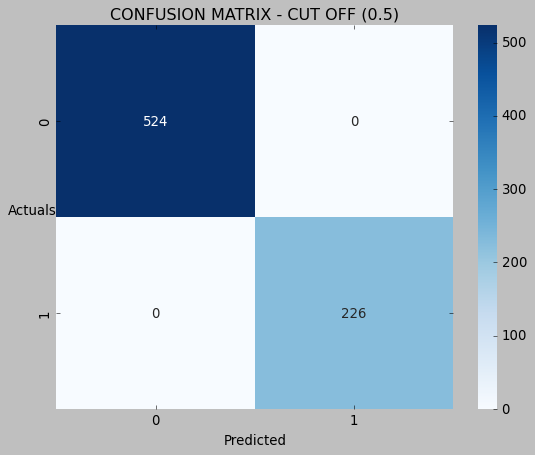

In [147]:
evaluate_train_model(XG_Boost)

The accuracuy of the model is 0.72
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       176
           1       0.53      0.47      0.50        74

    accuracy                           0.72       250
   macro avg       0.66      0.65      0.65       250
weighted avg       0.71      0.72      0.72       250



(None, None, None, 0.7216676904176905)

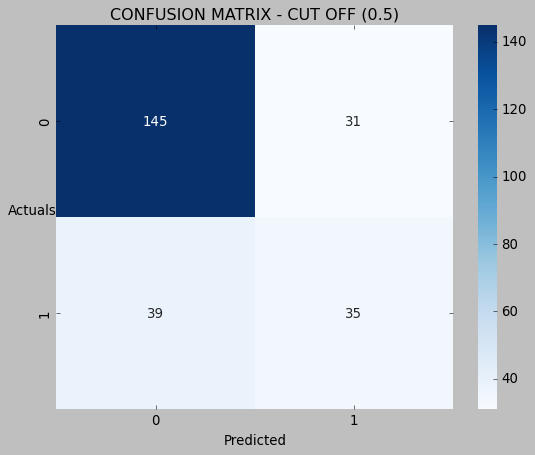

In [149]:
evaluate_test_model(XG_Boost)

### KNN Classification

In [154]:
Knn_3 = KNeighborsClassifier(n_neighbors=3)

In [156]:
Knn_3.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

0.8266666666666667
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       524
           1       0.78      0.59      0.67       226

    accuracy                           0.83       750
   macro avg       0.81      0.76      0.78       750
weighted avg       0.82      0.83      0.82       750



(None, None, None, 0.8789856785786665)

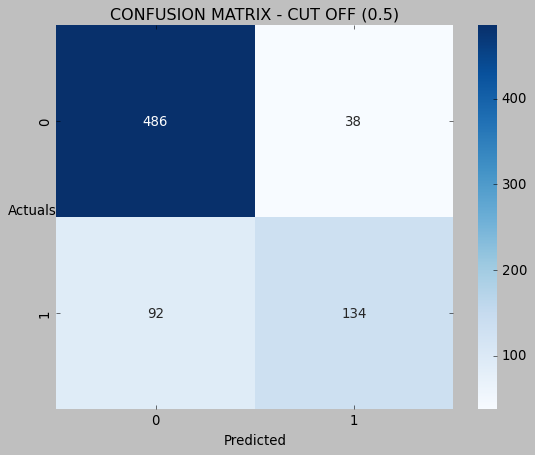

In [158]:
evaluate_train_model(Knn_3)

The accuracuy of the model is 0.6
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.70      0.75      0.73       176
           1       0.29      0.24      0.26        74

    accuracy                           0.60       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.58      0.60      0.59       250



(None, None, None, 0.47919226044226043)

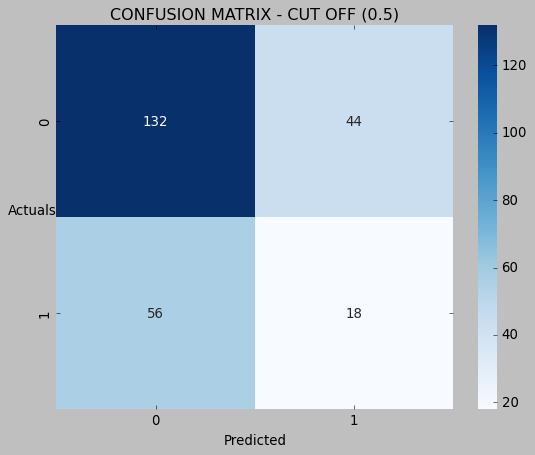

In [160]:
evaluate_test_model(Knn_3)

In [162]:
Knn_5 = KNeighborsClassifier(n_neighbors=5)

In [164]:
Knn_5.fit(X_train, Y_train)

KNeighborsClassifier()

0.7693333333333333
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.79      0.91      0.85       524
           1       0.68      0.45      0.54       226

    accuracy                           0.77       750
   macro avg       0.73      0.68      0.69       750
weighted avg       0.76      0.77      0.75       750



(None, None, None, 0.8149192731203134)

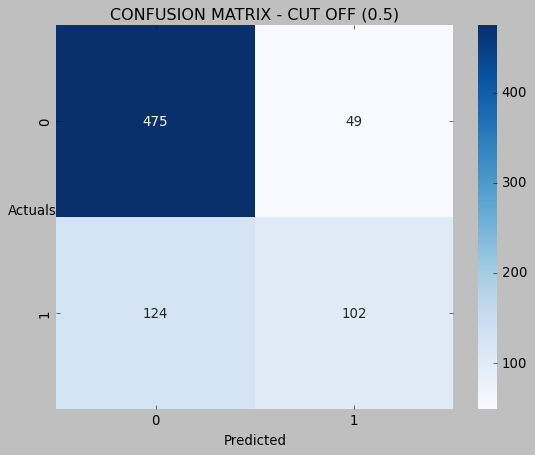

In [166]:
evaluate_train_model(Knn_5)

The accuracuy of the model is 0.636
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.71      0.83      0.76       176
           1       0.30      0.18      0.22        74

    accuracy                           0.64       250
   macro avg       0.50      0.50      0.49       250
weighted avg       0.59      0.64      0.60       250



(None, None, None, 0.516546375921376)

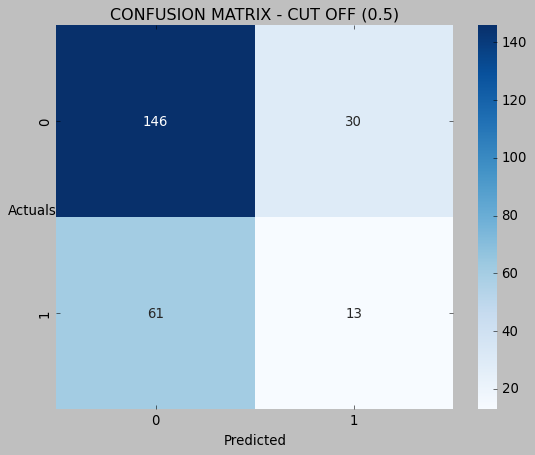

In [168]:
evaluate_test_model(Knn_5)

In [188]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X_train_scaled = pd.DataFrame(scalar.fit_transform(X_train), columns=X_train.columns)

In [190]:
X_train.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance__ 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance__ 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration__ 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
298,18,2515,3,4,43,1,1,False,False,False,True,False,True,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,False,True
160,24,2872,3,4,36,1,2,False,False,False,True,True,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True
268,14,8978,1,4,45,1,1,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,True,False,False,False,False,True
658,30,4221,2,1,28,2,1,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False,True,False,False,True,False
996,30,3857,4,4,40,1,1,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False,False,False,True,False,False,True,False,True,False,False,False,False,True


In [194]:
X_train_scaled.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance__ 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance__ 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration__ 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,-0.250147,-0.261330,0.033190,1.044691,0.639005,-0.708296,-0.414578,-0.605079,-0.615367,-0.255619,1.235011,-0.625672,0.930415,-0.200554,-0.323366,-0.227801,-0.318311,-0.745665,-0.227801,1.029776,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,1.385023,-0.455773,-0.442913,-0.584535,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,-0.416784,0.745665,-0.142857,-0.483273,-1.231576,1.231576
1,0.256451,-0.133829,0.033190,1.044691,0.032355,-0.708296,2.412091,-0.605079,-0.615367,-0.255619,1.235011,1.598281,-1.074789,-0.200554,-0.323366,-0.227801,-0.318311,-0.745665,-0.227801,1.029776,-0.127515,3.000000,-0.243561,-1.228154,-0.234206,-0.485371,-0.722010,-0.455773,-0.442913,1.710761,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,-0.416784,0.745665,-0.142857,-0.483273,-1.231576,1.231576
2,-0.587879,2.046905,-1.744835,1.044691,0.812334,-0.708296,-0.414578,-0.605079,1.625047,-0.255619,-0.809709,-0.625672,0.930415,-0.200554,-0.323366,-0.227801,-0.318311,1.341084,-0.227801,-0.971085,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,-0.722010,-0.455773,-0.442913,1.710761,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,2.399324,-1.341084,-0.142857,-0.483273,-1.231576,1.231576
3,0.763050,0.347961,-0.855823,-1.730463,-0.660960,1.050717,-0.414578,1.652678,-0.615367,-0.255619,-0.809709,-0.625672,-1.074789,4.986188,-0.323366,-0.227801,3.141586,-0.745665,-0.227801,-0.971085,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,1.385023,-0.455773,-0.442913,-0.584535,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,-0.416784,0.745665,-0.142857,-0.483273,0.811968,-0.811968
4,0.763050,0.217960,0.922202,1.044691,0.379012,-0.708296,-0.414578,-0.605079,1.625047,-0.255619,-0.809709,-0.625672,0.930415,-0.200554,-0.323366,-0.227801,-0.318311,1.341084,-0.227801,-0.971085,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,1.385023,-0.455773,-0.442913,-0.584535,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,2.399324,-1.341084,-0.142857,-0.483273,-1.231576,1.231576


In [196]:
X_test_scaled = pd.DataFrame(scalar.transform(X_test), columns=X_test.columns)

In [198]:
X_test_scaled.head()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents,checking_balance_1 - 200 DM,checking_balance__ 0 DM,checking_balance_> 200 DM,checking_balance_unknown,credit_history_critical,credit_history_good,credit_history_perfect,credit_history_poor,credit_history_very good,purpose_business,purpose_car,purpose_education,purpose_furniture/appliances,purpose_renovations,savings_balance_100 - 500 DM,savings_balance_500 - 1000 DM,savings_balance__ 100 DM,savings_balance_> 1000 DM,savings_balance_unknown,employment_duration_1 - 4 years,employment_duration_4 - 7 years,employment_duration__ 1 year,employment_duration_> 7 years,employment_duration_unemployed,other_credit_bank,other_credit_none,other_credit_store,housing_other,housing_own,housing_rent,job_management,job_skilled,job_unemployed,job_unskilled,phone_no,phone_yes
0,-0.503446,1.286898,-1.744835,-0.805411,-0.140974,-0.708296,2.412091,1.652678,-0.615367,-0.255619,-0.809709,-0.625672,-1.074789,-0.200554,-0.323366,4.389792,-0.318311,1.341084,-0.227801,-0.971085,-0.127515,3.000000,-0.243561,-1.228154,-0.234206,-0.485371,-0.72201,-0.455773,-0.442913,-0.584535,3.741657,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,2.399324,-1.341084,-0.142857,-0.483273,-1.231576,1.231576
1,1.269648,4.503713,-0.855823,0.119640,0.639005,-0.708296,-0.414578,-0.605079,1.625047,-0.255619,-0.809709,-0.625672,0.930415,-0.200554,-0.323366,-0.227801,-0.318311,1.341084,-0.227801,-0.971085,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,-0.72201,-0.455773,-0.442913,-0.584535,3.741657,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,2.399324,-1.341084,-0.142857,-0.483273,0.811968,-0.811968
2,-0.756745,-0.174186,-0.855823,1.044691,-0.140974,1.050717,-0.414578,-0.605079,-0.615367,-0.255619,1.235011,-0.625672,-1.074789,4.986188,-0.323366,-0.227801,-0.318311,-0.745665,-0.227801,1.029776,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,-0.72201,-0.455773,-0.442913,1.710761,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,-0.416784,0.745665,-0.142857,-0.483273,0.811968,-0.811968
3,1.269648,0.071173,0.922202,-0.805411,0.552341,-0.708296,2.412091,-0.605079,1.625047,-0.255619,-0.809709,-0.625672,0.930415,-0.200554,-0.323366,-0.227801,-0.318311,-0.745665,-0.227801,1.029776,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,-0.72201,-0.455773,-0.442913,1.710761,-0.267261,-0.410152,0.483273,-0.217913,-0.355142,0.656733,-0.483273,-0.416784,0.745665,-0.142857,-0.483273,0.811968,-0.811968
4,2.282845,0.485105,0.033190,1.044691,-1.007617,1.050717,2.412091,-0.605079,1.625047,-0.255619,-0.809709,-0.625672,-1.074789,4.986188,-0.323366,-0.227801,-0.318311,1.341084,-0.227801,-0.971085,-0.127515,-0.333333,-0.243561,0.814230,-0.234206,-0.485371,-0.72201,-0.455773,-0.442913,1.710761,-0.267261,-0.410152,0.483273,-0.217913,2.815772,-1.522690,-0.483273,-0.416784,0.745665,-0.142857,-0.483273,0.811968,-0.811968


In [200]:
Knn_5.fit(X_train_scaled, Y_train)

KNeighborsClassifier()

In [214]:
# for Train Scaled data

def evaluate_train_model_scaled(model):
    Y_train_predict = model.predict(X_train_scaled)

    Acc_train = print(model.score(X_train_scaled,Y_train))

    CM_train = print(sns.heatmap((metrics.confusion_matrix(Y_train,Y_train_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_train = print(metrics.classification_report(Y_train,Y_train_predict))

    probs = model.predict_proba(X_train_scaled)
    probs = probs[:, 1]
    auc_train = roc_auc_score(Y_train, probs)
    
    return Acc_train,CM_train,CR_train,auc_train  


In [216]:
# for Test Scaled Data

def evaluate_test_model_scaled(model):
    Y_test_predict = model.predict(X_test_scaled)

    Acc_test = print("The accuracuy of the model is {}".format(model.score(X_test_scaled,Y_test)))

    CM_test = print(sns.heatmap((metrics.confusion_matrix(Y_test,Y_test_predict)),annot=True,fmt='.5g'
                ,cmap='Blues'));
    plt.xlabel('Predicted');
    plt.ylabel('Actuals',rotation=0);
    plt.title('CONFUSION MATRIX - CUT OFF (0.5)')

    CR_test = print(metrics.classification_report(Y_test,Y_test_predict))

    probs = model.predict_proba(X_test_scaled)
    probs = probs[:, 1]
    auc_test = roc_auc_score(Y_test, probs)
    
    return Acc_test,CM_test,CR_test,auc_test

0.8
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.82      0.91      0.86       524
           1       0.73      0.54      0.62       226

    accuracy                           0.80       750
   macro avg       0.77      0.72      0.74       750
weighted avg       0.79      0.80      0.79       750



(None, None, None, 0.8633722894007971)

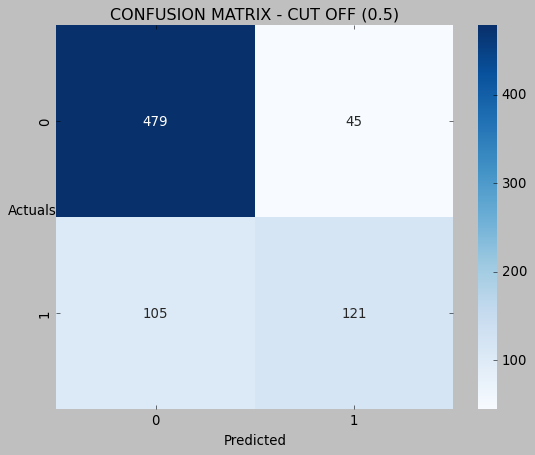

In [218]:
evaluate_train_model_scaled(Knn_5)

The accuracuy of the model is 0.704
Axes(0.125,0.1;0.62x0.8)
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       176
           1       0.50      0.30      0.37        74

    accuracy                           0.70       250
   macro avg       0.62      0.59      0.59       250
weighted avg       0.67      0.70      0.68       250



(None, None, None, 0.6631603194103195)

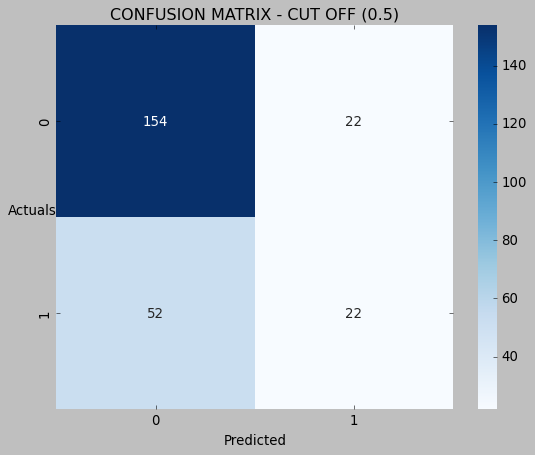

In [220]:
evaluate_test_model_scaled(Knn_5)

In [242]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Assuming X_train_scaled, y_train, X_test_scaled, y_test are already defined

accuracy_scores = []
recall_scores = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=i)  # Changed 'k' to 'i' for iteration
    knn.fit(X_train_scaled, Y_train)

    # Predictions
    y_pred = knn.predict(X_test_scaled)

    # Compute metrics
    acc = accuracy_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred, average='macro')  # Use 'macro' for multi-class problems

    # Store results
    accuracy_scores.append(acc)
    recall_scores.append(rec)

    print(f"k={i}: Accuracy={acc:.4f}, Recall={rec:.4f}")

k=1: Accuracy=0.6840, Recall=0.5994
k=2: Accuracy=0.7360, Recall=0.5932
k=3: Accuracy=0.7080, Recall=0.6007
k=4: Accuracy=0.6920, Recall=0.5346
k=5: Accuracy=0.7040, Recall=0.5861
k=6: Accuracy=0.7320, Recall=0.5786
k=7: Accuracy=0.7280, Recall=0.5993
k=8: Accuracy=0.7400, Recall=0.5882
k=9: Accuracy=0.7360, Recall=0.5971
k=10: Accuracy=0.7400, Recall=0.5804
k=11: Accuracy=0.7320, Recall=0.5825
k=12: Accuracy=0.7280, Recall=0.5680
k=13: Accuracy=0.7400, Recall=0.5961
k=14: Accuracy=0.7280, Recall=0.5719
k=15: Accuracy=0.7240, Recall=0.5769
k=16: Accuracy=0.7120, Recall=0.5448
k=17: Accuracy=0.7240, Recall=0.5690
k=18: Accuracy=0.7280, Recall=0.5601
k=19: Accuracy=0.7240, Recall=0.5651
k=20: Accuracy=0.7320, Recall=0.5630


In [254]:
best = n = -1
for i in range(0, len(accuracy_scores)):
    if accuracy_scores[i]+recall_scores[i] > best:
        best = accuracy_scores[i]+recall_scores[i]
        n = i+1; # 0-based
        
print(f"best_performance={best}, k={n}")

best_performance=1.3360534398034398, k=13


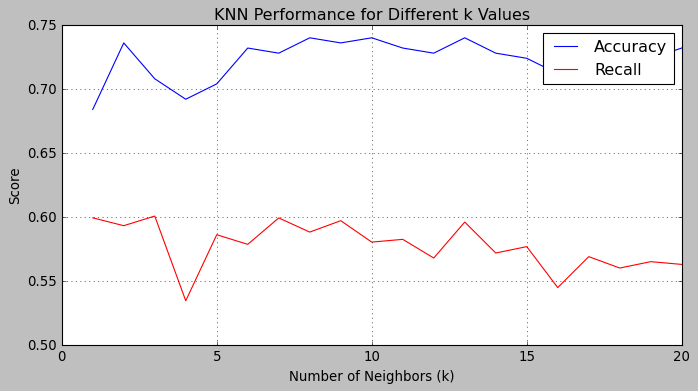

In [258]:
import matplotlib.pyplot as plt

# Assuming k_values, accuracy_scores, and recall_scores are already defined

k_values = list(i for i in range(1, 21))
# Plot Accuracy and Recall vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, label="Accuracy")
plt.plot(k_values, recall_scores, color='red', label="Recall") # Added label for recall

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")

plt.title("KNN Performance for Different k Values")

plt.legend()  # Added legend to show labels
plt.grid(True)  # Added grid for better readability
plt.show()

k=1: Accuracy=0.6800, Recall=0.5926
k=2: Accuracy=0.7360, Recall=0.5893
k=3: Accuracy=0.7000, Recall=0.5911
k=4: Accuracy=0.7080, Recall=0.5498
k=5: Accuracy=0.7040, Recall=0.5861
k=6: Accuracy=0.7160, Recall=0.5516
k=7: Accuracy=0.7360, Recall=0.6089
k=8: Accuracy=0.7400, Recall=0.5843
k=9: Accuracy=0.7440, Recall=0.6067
k=10: Accuracy=0.7200, Recall=0.5584
k=11: Accuracy=0.7320, Recall=0.5982
k=12: Accuracy=0.7040, Recall=0.5313
k=13: Accuracy=0.7240, Recall=0.5808
k=14: Accuracy=0.7280, Recall=0.5640
k=15: Accuracy=0.7320, Recall=0.5865
k=16: Accuracy=0.7240, Recall=0.5612
k=17: Accuracy=0.7280, Recall=0.5797
k=18: Accuracy=0.7280, Recall=0.5640
k=19: Accuracy=0.7360, Recall=0.5815
k=20: Accuracy=0.7080, Recall=0.5342


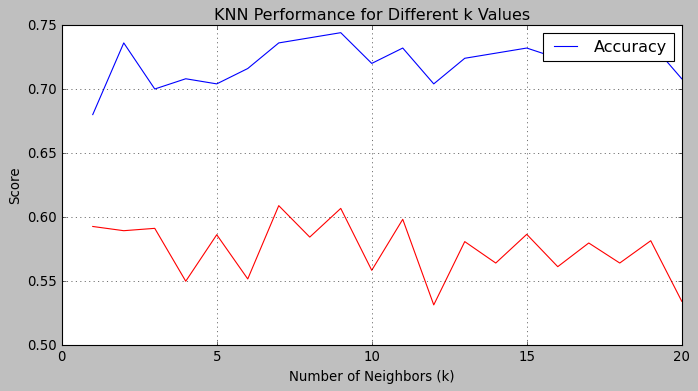

In [262]:
# USing MinMax Scaler

from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score

# Normalize the features using Min-Max Scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a range of k values to test
k_values = range(1, 21)
accuracy_scores = []
recall_scores = []

# Train multiple KNN models for different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, Y_train)
    
    # Predictions
    y_pred = knn.predict(X_test_scaled)
    
    # Compute metrics
    acc = accuracy_score(Y_test, y_pred)
    rec = recall_score(Y_test, y_pred, average='macro')  # Use 'macro' for multi-class problems
    
    # Store results
    accuracy_scores.append(acc)
    recall_scores.append(rec)

    print(f"k={k}: Accuracy={acc:.4f}, Recall={rec:.4f}")

# Plot Accuracy and Recall vs. k
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, label="Accuracy")
plt.plot(k_values, recall_scores, color='red')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Score")
plt.title("KNN Performance for Different k Values")
plt.legend()
plt.grid()
plt.show()